## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

#### Cargar y Exploramos el datasets


In [2]:
df = pd.read_csv("consumo_nafta_formosa_500.csv")
print("Primeras 5 filas del datasets")
df.head(5)

Primeras 5 filas del datasets


,fecha,distancia_km,tiempo_min,trafico,auto_modelo,tipo_trayecto,precio_nafta_por_litro,consumo_por_km,combustible_litros
0,2024-05-01,8.5,56,Pesado,Fiat Cronos 1.3,Ruta,885.48,0.084914,0.72
1,2024-05-02,8.5,21,Leve,VW Gol 1.6,Urbano,909.25,0.111755,0.95
2,2024-05-03,8.5,25,Moderado,Toyota Etios 1.5,Urbano,901.22,0.094540,0.80
3,2024-05-04,15.0,33,Moderado,VW Gol 1.6,Urbano,896.61,0.066963,1.00
4,2024-05-05,8.5,28,Moderado,Toyota Etios 1.5,Ruta,879.62,0.119419,1.02


## Procesamiento

#### Codificamos la variable trafico en :
* Leve = 0
* Moderado = 1
* Pesado = 2
#### codificamos la variable tipo_trayecto en :
* Urbano = 0
* Ruta = 1
#### hacemos One-hot para los modelo de auto esto quiere decir que cada modelo unico de auto se pasa hace 0 y 1

In [3]:
le = LabelEncoder()

df["trafico_encoded"] = le.fit_transform(df["trafico"])
df["tipo_trayecto_encoded"] = le.fit_transform(df["tipo_trayecto"])

df = pd.get_dummies(df, columns=["auto_modelo"])

## Seleccionamos la variables a analizar

In [4]:
X = df[["distancia_km", "tiempo_min", "trafico_encoded", "tipo_trayecto_encoded", "auto_modelo_Fiat Cronos 1.3", "auto_modelo_Toyota Etios 1.5", "auto_modelo_VW Gol 1.6"]]
y = df["combustible_litros"]

### Divimos los datos en Entrenamiento y Prueba 
##### Divimos en :
* 80 % en entrenamiento
* 20 % en Prueba

In [5]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos de Entrenamiento {X_train.shape} Datos de Prueba {X_test.shape}")

Datos de Entrenamiento (400, 7) Datos de Prueba (100, 7)


## Entrenamiento del Modelo

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predecir y Evaluar el modelo

In [7]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMétricas de Evaluación:")
print(f"- Error Absoluto Medio (MAE): {mae:.3f} litros")
print(f"- R² Score: {r2:.3f} (1.0 es perfecto)")


Métricas de Evaluación:
- Error Absoluto Medio (MAE): 0.172 litros
- R² Score: 0.515 (1.0 es perfecto)


### Grafico de Importancia de feature

* se utiliza para visualizar la importancia de cada variable (feature) en las predicciones del modelo de Random Forest. Es una forma clave de entender qué factores influyen más en el consumo de nafta en tu proyecto

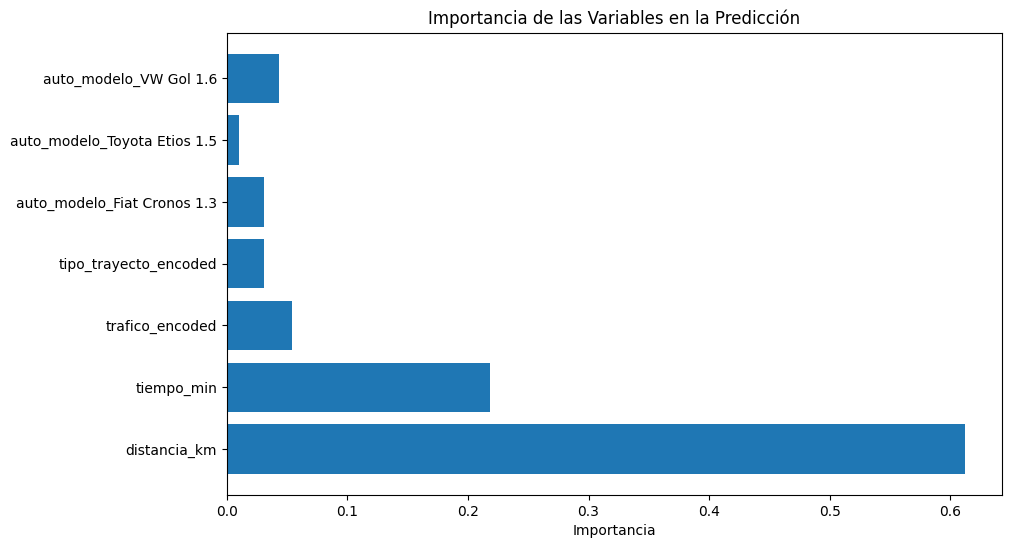

In [8]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importancia de las Variables en la Predicción")
plt.xlabel("Importancia")
plt.show()

### Exportancion del Modelo a .plk

In [11]:
joblib.dump(model, '../ml-api/model/modelo_consumo_nafta.pkl')
print("\nModelo guardado en: '../ml-api/model/modelo_consumo_nafta.pkl'")


Modelo guardado en: '../ml-api/model/modelo_consumo_nafta.pkl'
